data from https://www.kaggle.com/dronio/SolarEnergy/data

`unzip` from command line if getting .cpgz filetype

In [30]:
import numpy as np
import pandas as pd
import math 

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import xgboost as xgb
from sklearn.grid_search import GridSearchCV

# from keras.models import Sequential
# from keras.layers import Dense

In [8]:
d = pd.read_csv('./data/SolarPrediction.csv')
d.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [9]:
d.shape

(32686, 11)

In [32]:
d['Radiation'].describe()

count    32686.000000
mean       207.124697
std        315.916387
min          1.110000
25%          1.230000
50%          2.660000
75%        354.235000
max       1601.260000
Name: Radiation, dtype: float64

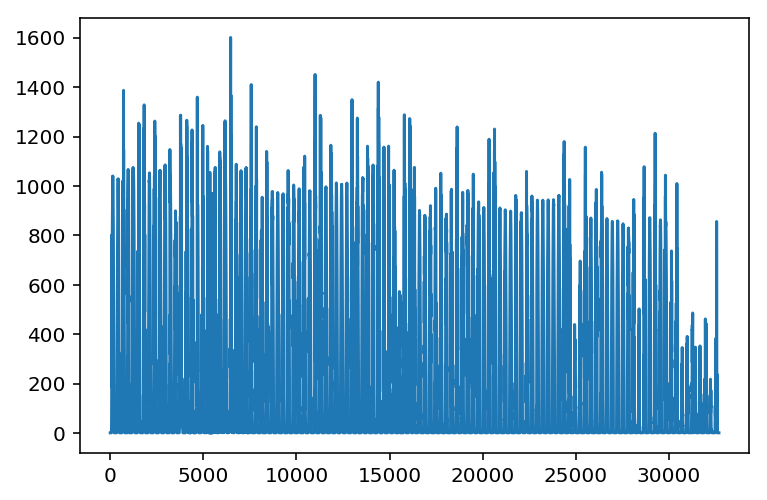

In [15]:
d['Radiation'].plot()

In [18]:
data = d.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1)
x = data.values
data.head(2)

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37


In [19]:
y = data.pop('Radiation')
y.head(2)

0    1.21
1    1.21
Name: Radiation, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=69)

In [24]:
dmat = xgb.DMatrix(X_train, y_train)

In [27]:
params = {
    'eta':0.1,
    'seed':0,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'objective':'reg:linear',
    'max_depth':3,
    'min_child_weight':1
}

In [28]:
model = xgb.train(params, dmat)

In [29]:
test_dmat = xgb.DMatrix(X_test)
y_pred = model.predict(test_dmat)

In [31]:
print('RMSE: %f'%math.sqrt(mean_squared_error(y_test.values,y_pred)))

RMSE: 157.674447


Well, that's below a standard deviation

## Grid Searchin'

In [33]:
cv_params = {
    'max_depth': [3,5,7], 
    'min_child_weight': [1,3,5]
}

ind_params = {
    'learning_rate': 0.1, 
    'n_estimators': 1000, 
    'seed':0, 
    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
    'objective': 'reg:linear'
}

optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), cv_params, scoring='neg_mean_squared_error', cv = 5, n_jobs = -1) 

In [34]:
optimized_GBM.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
optimized_GBM.grid_scores_